# Experiment



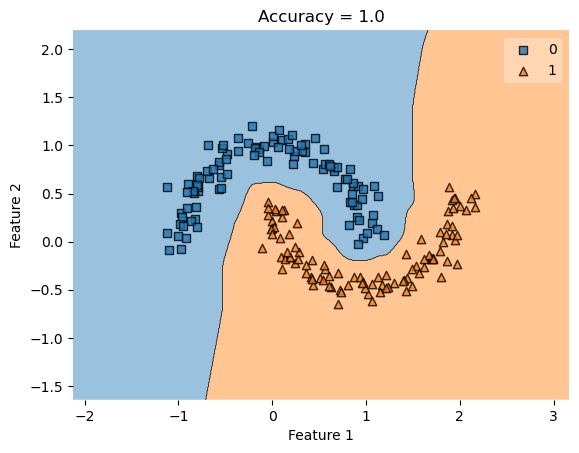

In [286]:
%reload_ext autoreload 
%autoreload 2

from kernel_logistic import KernelLogisticRegression 
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_moons, make_circles
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 

X, y = make_moons(200, shuffle = True, noise = 0.1)
KLR = KernelLogisticRegression(rbf_kernel, gamma = 100)
KLR.fit(X, y)
KLR.score(X, y)

plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")


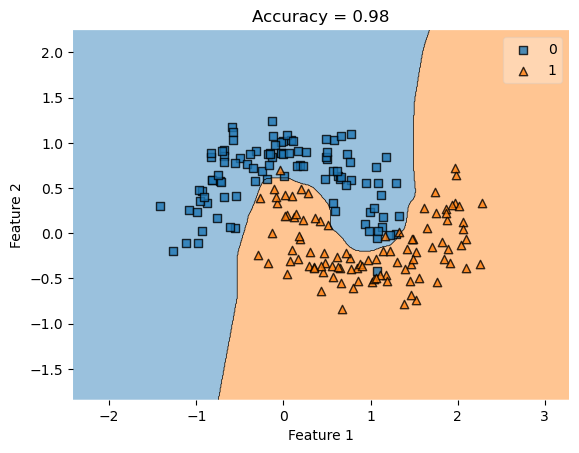

In [287]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

1.0


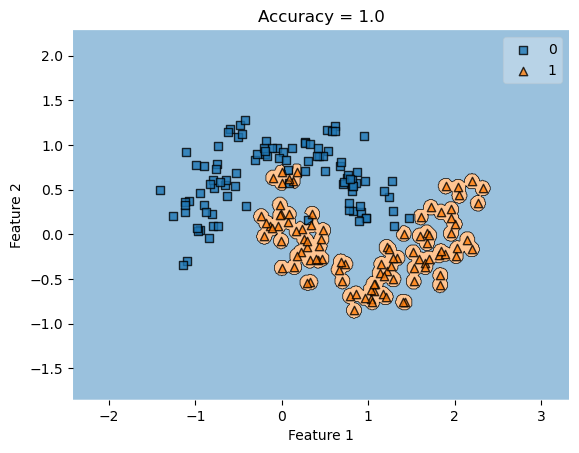

In [269]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 

KLR = KernelLogisticRegression(rbf_kernel, gamma = 100000)
KLR.fit(X, y)
print(KLR.score(X, y))
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")


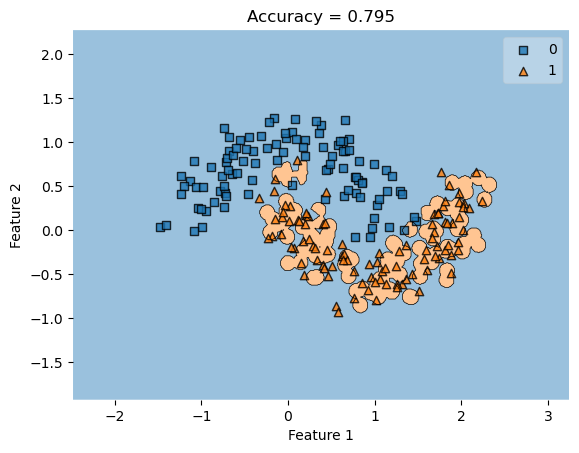

In [270]:
# new data with the same rough pattern
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

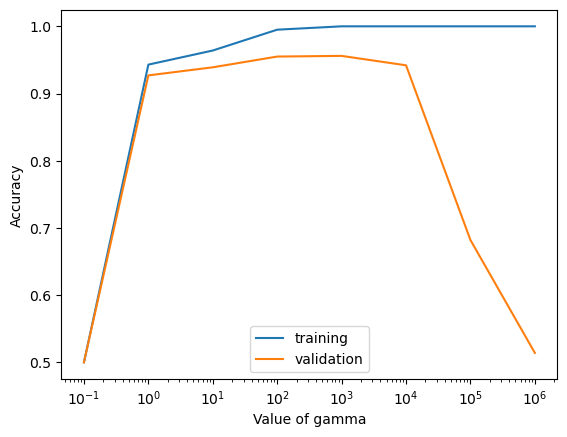

In [271]:
import pandas as pd
import numpy as np
np.random.seed()

def experiment(noise, data_geometry):
    gamma_values = 10.0**np.arange(-1, 7)
    df = pd.DataFrame({"gamma": [], "train" : [], "test" : []})

    for rep in range(10):
        X_train, y_train = data_geometry(100, shuffle = True, noise = noise)
        X_test, y_test = data_geometry(100, shuffle = True, noise = noise)

        for gamma in gamma_values:
            KLR = KernelLogisticRegression(rbf_kernel, gamma = gamma)
            KLR.fit(X_train, y_train)
            to_add = pd.DataFrame({"gamma" : [gamma],
                                "train" : [KLR.score(X_train, y_train)],
                                "test" : [KLR.score(X_test, y_test)]})

            df = pd.concat((df, to_add))

    means = df.groupby("gamma").mean().reset_index()

    plt.xscale("log")
    plt.plot(means["gamma"], means["train"], label = "training")
    plt.plot(means["gamma"], means["test"], label = "validation")
    plt.legend()
    labs = plt.gca().set(xlabel = "Value of gamma",
                ylabel = "Accuracy")

experiment(0.2, make_moons)

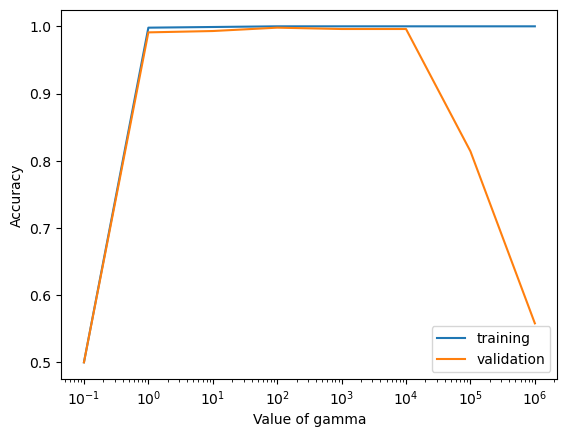

In [272]:
experiment(0.1, make_moons)

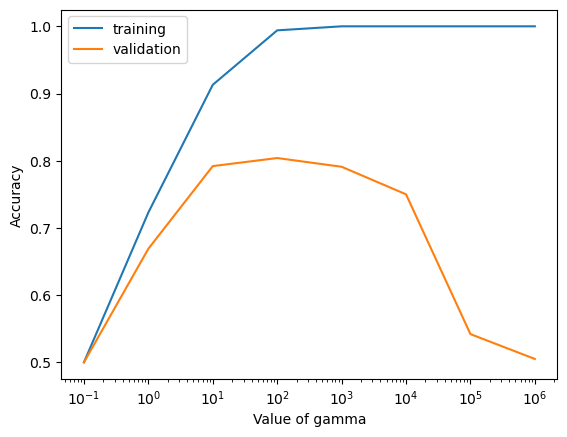

In [273]:
experiment(0.4, make_moons)

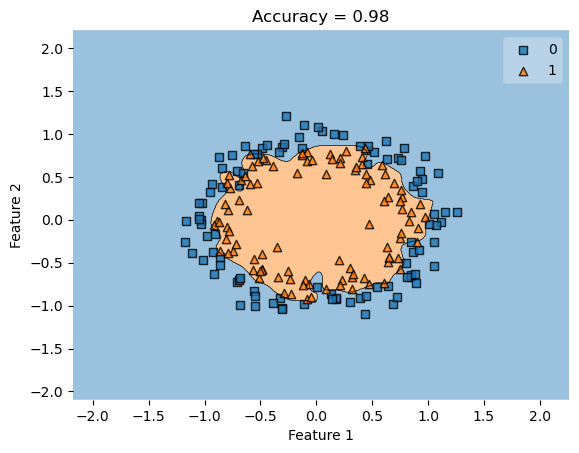

In [288]:
X, y = make_circles(200, shuffle = True, noise = 0.1)
KLR = KernelLogisticRegression(rbf_kernel, gamma = 100)
KLR.fit(X, y)
KLR.score(X, y)

plot_decision_regions(X, y, clf = KLR)
title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

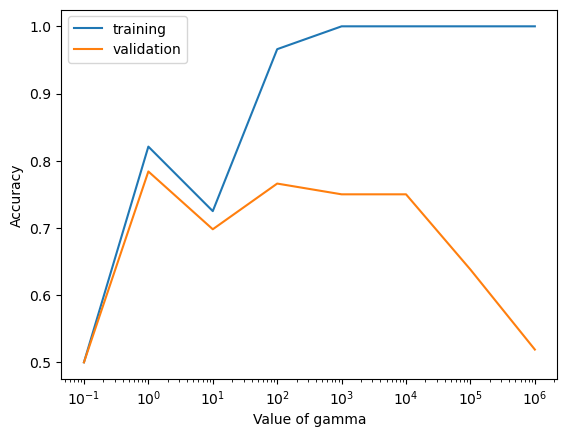

In [275]:
experiment(0.1, make_circles)

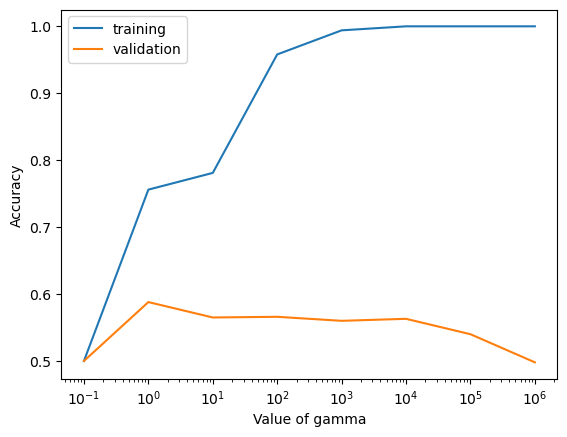

In [282]:
experiment(0.2, make_circles)